Sentiment analysis for tweets on covid vaccines by *MAVERICK_GR*

In [ ]:
#importing all necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
print('Setup complete')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Setup complete


In [ ]:
# Upload the csv file for tweets on covid-19 vaccines 
from google.colab import files
files.upload()


Saving vaccination_all_tweets.csv to vaccination_all_tweets.csv


In [ ]:
#Read the csv file
df = pd.read_csv('vaccination_all_tweets.csv')

In [ ]:
#Show the top 5 rows of the dataset
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
#Check for null values 
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
#Print the name of the columns
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
#drop all unnecessary columns
df_new = df.drop(['id', 'user_name', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites',
              'user_verified','source', 'is_retweet'],axis=1)
df_new

,user_location,date,text,hashtags,retweets,favorites
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,"San Francisco, CA",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1
2,Your Bed,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,NaN,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0
...,...,...,...,...,...,...
228202,"Bengaluru, India",2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
228203,"Bengaluru, India",2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1
228204,"Bengaluru, India",2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
228205,Southern Africa,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],0,0


In [ ]:
#Printing the first tweet
df_new['text'].iloc[0]

'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF'

In [ ]:
# write a function to process the tweets. Steps ->
#1. convert the text into single case ( lower)
#2. Remove https,@user & # tags
#3. tokenize the text
#4. check for stop words
#5. get a list of words after removing the stop words
def process_tweets(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    non_stop_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(non_stop_words)

In [ ]:
# apply the function to text column of the dataframe
df_new.text = df_new['text'].apply(process_tweets)

In [ ]:
#check for duplicate entries
df_new['text'].duplicated().value_counts()


False    211771
True      16436
Name: text, dtype: int64

In [ ]:
#drop duplicate entries and recheck again
df_new = df_new.drop_duplicates('text')
df_new['text'].duplicated().value_counts()

False    211771
Name: text, dtype: int64

In [ ]:
#Apply stemming using porterstemmer
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
#Apply the defined function to the tweets
df_new['text'] = df_new['text'].apply(lambda x:stemming(x))

In [ ]:
#Define a function to find the polarity of the tweets
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create a new column 'polarity' and save the value returned by the function
df_new['polarity'] = df_new['text'].apply(polarity)
df_new.head()

,user_location,date,text,hashtags,retweets,favorites,polarity
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],0,0,0.0
1,"San Francisco, CA",2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1,-0.5
2,Your Bed,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,0.0
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129,0.1
4,NaN,2020-12-12 20:17:19,explain need vaccine borisjohnson matthancock ...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,0.0


In [ ]:
#define a function to derive sentiment based on the value of polatity
def derive_sentiment(data):
    if data<0:
        return "Negative"
    elif data == 0:
        return "Neutral"
    elif data>0:
        return "Positive"

In [ ]:
# Create a new column sentiment to save the value returned from the function
df_new['Sentiment'] = df_new['polarity'].apply(derive_sentiment)
df_new.head()

,user_location,date,text,hashtags,retweets,favorites,polarity,Sentiment
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],0,0,0.0,Neutral
1,"San Francisco, CA",2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1,-0.5,Negative
2,Your Bed,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,0.0,Neutral
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129,0.1,Positive
4,NaN,2020-12-12 20:17:19,explain need vaccine borisjohnson matthancock ...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,0.0,Neutral


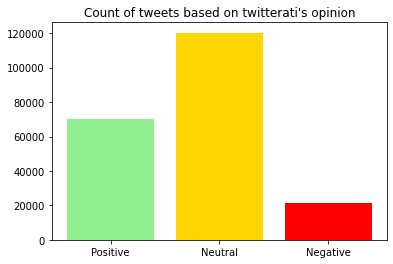

In [ ]:
# Using bar plot depict the opinion of the twitter users towards the vaccines
sorted_sentiment = pd.value_counts(df_new['Sentiment']).sort_values(ascending = False)
count = [sorted_sentiment[1], sorted_sentiment[0],sorted_sentiment[2]]
bars = ('Positive', 'Neutral', 'Negative')
x_pos = np.arange(len(bars))
plt.bar(x_pos, count, color=['lightgreen','gold','red'])
plt.xticks(x_pos, bars)
plt.title('Count of tweets based on twitterati\'s opinion')
plt.show()

Text(0.5, 1.0, "People's sentiment on covid vaccines")

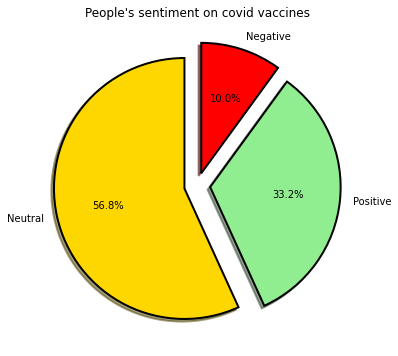

In [ ]:
# Pie chart showing people's setiments
plt.figure(figsize=(6,6))
colors = ("gold","lightgreen","red")
wp = {'linewidth':2,'edgecolor':'black'}
explode = (0.1,0.1,0.1)
values = df_new['Sentiment'].value_counts()
values.plot(kind='pie',autopct='%1.1f%%',colors=colors,explode=explode,startangle=90,label='',wedgeprops=wp,shadow=True)
plt.title('People\'s sentiment on covid vaccines')

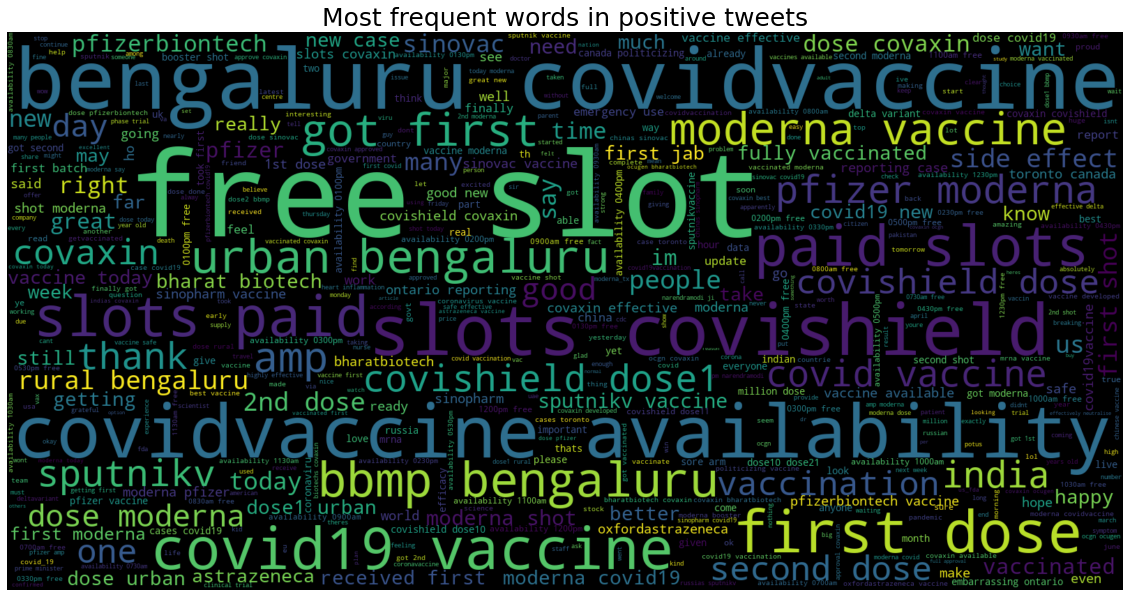

Done


In [ ]:
#Wordcloud - Positive tweets
pos = df_new[df_new['Sentiment']=="Positive"]
pos=pos.sort_values(['polarity'], ascending= False)
text = ' '.join([word for word in pos['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=25)
plt.savefig('Wordcloud.png')
plt.show()
print('Done')

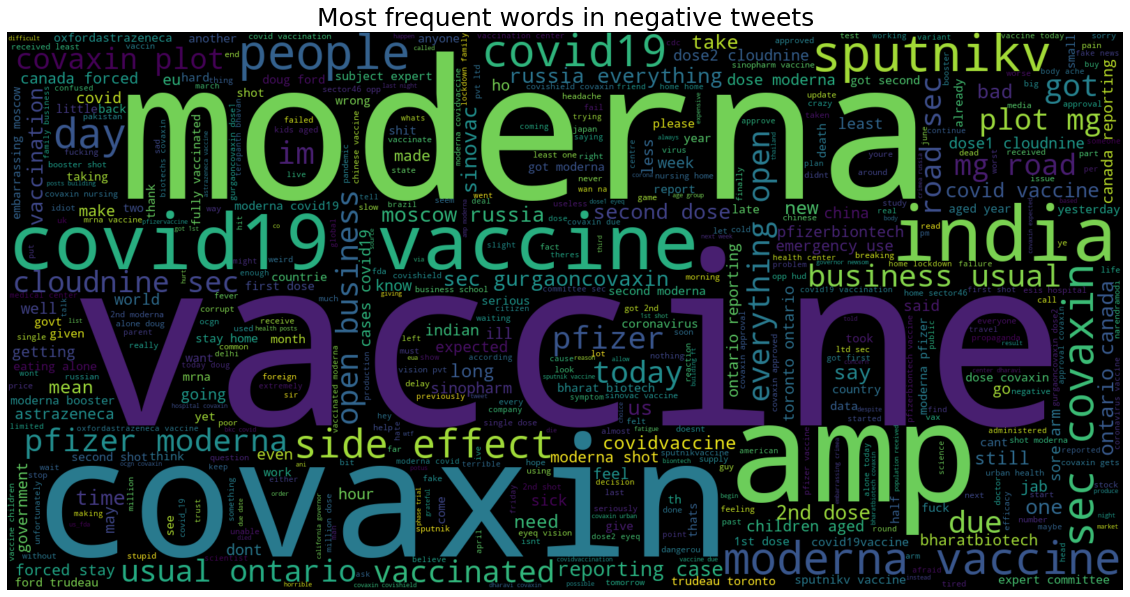

In [ ]:
#Wordcloud - Negative tweets
neg = df_new[df_new['Sentiment']=="Negative"]
neg = neg.sort_values(['polarity'], ascending= False)
text = ' '.join([word for word in neg['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=25)
plt.show()

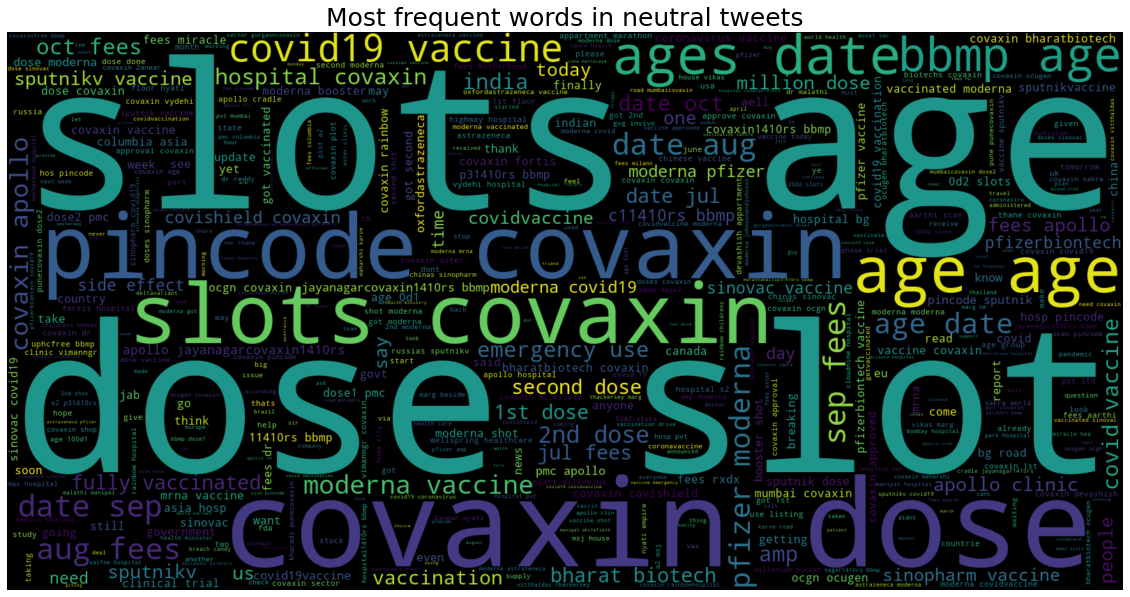

In [ ]:
#Wordcloud - Neutral tweets
nue = df_new[df_new['Sentiment']=="Neutral"]
nue = nue.sort_values(['polarity'], ascending= False)
text = ' '.join([word for word in nue['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=25)
plt.show()

In [ ]:
# Top 5 locations sending out tweets with positive setiment 
df_new_pos = df_new[df_new['Sentiment']=="Positive"]
df_new_pos= df_new_pos.sort_values(['polarity'], ascending=False)
df_new_pos['user_location'].value_counts().head(5)

Bengaluru, India                  6926
India                             2500
New Delhi, India                   977
Toronto, Canada  and Worldwide     705
Mumbai, India                      607
Name: user_location, dtype: int64

In [ ]:
# Top 5 locations sending out tweets with Negative setiment 
df_new_neg = df_new[df_new['Sentiment']=="Negative"]
df_new_neg= df_new_neg.sort_values(['polarity'], ascending=False)
df_new_neg['user_location'].value_counts().head(5)

Toronto, Canada  and Worldwide    864
India                             748
New Delhi, India                  283
United States                     273
Mumbai, India                     198
Name: user_location, dtype: int64

In [ ]:
# Top 5 locations sending out tweets with neutral setiment 
df_new_nue = df_new[df_new['Sentiment']=="Neutral"]
df_new_nue= df_new_nue.sort_values(['polarity'], ascending=False)
df_new_nue['user_location'].value_counts().head(5)

Bengaluru, India    11826
India                4210
New Delhi, India     1492
Mumbai, India        1039
United States         851
Name: user_location, dtype: int64

In [ ]:
#Extracting city and state/country from user_location column
df_new[['City','State/Country']] = df_new['user_location'].str.split(',', n=1, expand = True)
df_new = df_new.drop(['user_location'], axis = 1)
df_new

,date,text,hashtags,retweets,favorites,polarity,Sentiment,City,State/Country
0,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],0,0,0.0,Neutral,La Crescenta-Montrose,CA
1,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1,-0.5,Negative,San Francisco,CA
2,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,0.0,Neutral,Your Bed,None
3,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129,0.1,Positive,Vancouver,BC - Canada
4,2020-12-12 20:17:19,explain need vaccine borisjohnson matthancock ...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,0.0,Neutral,NaN,NaN
...,...,...,...,...,...,...,...,...,...
228202,2021-11-15 09:00:15,45 urban bengaluru covidvaccine availability 1...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0,0.2,Positive,Bengaluru,India
228203,2021-11-15 08:30:26,1844 bbmp bengaluru covidvaccine availability ...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1,0.4,Positive,Bengaluru,India
228204,2021-11-15 08:30:15,1844 urban bengaluru covidvaccine availability...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0,0.2,Positive,Bengaluru,India
228205,2021-11-15 08:03:03,promote vaccines leaving stronger russia vacci...,['SputnikV'],0,0,0.0,Neutral,Southern Africa,None


In [ ]:
#Top 20 locations sending out tweets - since some city names are entered as the country name, we can see India, US & others here
df_new['City'].value_counts().head(20)

Bengaluru        19210
India             7549
New Delhi         4312
Toronto           3475
Mumbai            3008
London            2103
Beijing           1862
United States     1726
Hyderabad         1376
Los Angeles       1262
New York          1230
California        1227
Chennai           1170
Sri Lanka          978
Canada             937
Moscow             875
Delhi              702
Pune               679
Malaysia           662
Washington         651
Name: City, dtype: int64

In [ ]:
#Top 20 state/countries sending out tweets
df_new['State/Country'].value_counts().head(20)

 India                    31433
 USA                       4242
 CA                        2506
 England                   2130
 Canada  and Worldwide     1868
 Ontario                   1640
 NY                        1183
 Pakistan                  1107
 TX                        1036
 China                      825
 Canada                     789
 FL                         742
 DC                         494
 IL                         486
 Sri Lanka                  485
 Russia                     484
 UK                         481
 WA                         458
 MA                         452
 United Kingdom             442
Name: State/Country, dtype: int64

In [ ]:
# Dynamic setiment anlysis for a given location
loc = input('Enter the location to find its sentiment:')
df_loc = df_new[df_new['City']== str(loc)]
pd.value_counts(df_loc['Sentiment'])

In [ ]:
#Top 5 "favorite" tweets
df_sort = df.sort_values('favorites', ascending = False)
df_sort['new_index'] = np.arange(df_sort.shape[0])
df_sort.set_index(['new_index'], inplace = True)
for i in range(0,5):
    print(df_sort['text'][i])
    print('\n')
    i = i +1